# Problem Set 3, due Tuesday, Feb 19th, 11:59pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  A central variable, _progresa_ is coded in a
rather unintuitive way.  Find it's actual coding scheme (levels).  Does this fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [5]:
# importing all the libraries 
import pandas as pd
from collections import OrderedDict
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [11]:
#reading the data
progress_a=pd.read_csv("progresa_sample.csv.gz")

#null_columns=train.columns[train.isnull().any()]
#train[null_columns].isnull().sum()

#displaying all the columns that have null values



null_columns = pd.isnull(progress_a).sum(axis=0)
null_columns

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [12]:
temp = pd.Index(['year','folnum','village','poor','progresa'])
print(temp)
index = null_columns.index.difference(temp)
#null_columns = null_columns[index]

Index(['year', 'folnum', 'village', 'poor', 'progresa'], dtype='object')


In [13]:
#Removing columns which are categorical variables
summary = progress_a.describe()
summary.T 

#removing 'year', 'folnum', 'village' columns
temp2 = pd.Index(['year','folnum','village']) 

col=summary.columns.difference(temp2)
summary2=summary[col].T
summary2


,count,mean,std,min,25%,50%,75%,max
age,77250.0,11.366460,3.167744,6.000000,9.000000,11.000000,14.000000,17.000000
dist_cap,77250.0,147.674452,76.063134,9.465392,92.327050,132.001494,184.445225,359.774457
dist_sec,77250.0,2.418910,2.234109,0.000000,0.574000,2.279000,3.582000,14.879000
fam_n,77250.0,7.215715,2.352900,1.000000,6.000000,7.000000,9.000000,24.000000
grc,70701.0,3.963537,2.499063,0.000000,2.000000,4.000000,6.000000,14.000000
grc97,77250.0,3.705372,2.572387,0.000000,1.000000,4.000000,6.000000,14.000000
hohage,77240.0,44.436717,11.620372,15.000000,36.000000,43.000000,51.000000,98.000000
hohedu,77250.0,2.768104,2.656106,0.000000,0.000000,2.000000,4.000000,20.000000
hohsex,77230.0,0.925185,0.263095,0.000000,1.000000,1.000000,1.000000,1.000000
hohwag,77250.0,586.985312,788.133664,0.000000,120.000000,500.000000,750.000000,14000.000000


In [14]:
#computing mean and standard deviation
mean=summary2['mean']
std=summary2['std']
print(mean)
print(std)

age               11.366460
dist_cap         147.674452
dist_sec           2.418910
fam_n              7.215715
grc                3.963537
grc97              3.705372
hohage            44.436717
hohedu             2.768104
hohsex             0.925185
hohwag           586.985312
indig              0.298324
min_dist         103.447520
sc                 0.819818
sc97               0.813922
sex                0.512211
welfare_index    690.346564
Name: mean, dtype: float64
age                3.167744
dist_cap          76.063134
dist_sec           2.234109
fam_n              2.352900
grc                2.499063
grc97              2.572387
hohage            11.620372
hohedu             2.656106
hohsex             0.263095
hohwag           788.133664
indig              0.457525
min_dist          42.089441
sc                 0.384342
sc97               0.389172
sex                0.499854
welfare_index    139.491130
Name: std, dtype: float64


### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [15]:
#seperating into treatment and control group
treatment=progress_a[progress_a.progresa=="basal"]
control=progress_a[progress_a.progresa=="0"]

In [35]:
# seperating poor for treatment and control group
treatment_poor=treatment[treatment.poor=="pobre"]
control_poor=control[control.poor=="pobre"]

#selecting treament data for poor in 97
treatment_poor_97=treatment_poor[treatment_poor.year==97]
treatment_poor_98=treatment_poor[treatment_poor.year==98]


#selecting control data for poor in 97
control_poor_97=control_poor[control_poor.year==97]
control_poor_98=control_poor[control_poor.year==98]

#calculating mean for control and treatment group in the year 97
treatment_poor_97_mean= treatment_poor_97.mean()
control_poor_97_mean=control_poor_97.mean()

#dropping variables
treatment_poor_97_mean.drop(['year', 'folnum', 'village'])
control_poor_97_mean.drop(['year','folnum','village','progresa'])


sex                0.505052
indig              0.332207
dist_sec           2.507662
sc                 0.815186
grc                3.543050
fam_n              7.302469
min_dist         103.237854
dist_cap         153.769730
hohedu             2.590348
hohwag           573.163558
welfare_index    659.579100
hohsex             0.922947
hohage            44.276918
age               10.742023
grc97              3.543050
sc97               0.815186
dtype: float64

In [17]:
treatment_poor_97_mean.index

Index(['year', 'sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist',
       'dist_cap', 'hohedu', 'hohwag', 'welfare_index', 'hohsex', 'hohage',
       'age', 'village', 'folnum', 'grc97', 'sc97'],
      dtype='object')

In [18]:
p_values = []

for eachvalue in treatment_poor_97_mean.index:    
    t,p = ttest_ind(control_poor_97_mean[eachvalue] , treatment_poor_97_mean[eachvalue])
    p_values.append(p)


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
temp = pd.Series(treatment_poor_97_mean.index)
treatment_values = pd.Series(treatment_poor_97_mean.values)
control_values = pd.Series(control_poor_97_mean.values)



df_1997 = pd.DataFrame(OrderedDict({'Variable':temp,'Average value of treatment':treatment_values,'Average value of control':control_values}))

In [48]:
df_1997
df_1997['treatment_control_difference']=df_1997['Average value of treatment']-df_1997['Average value of control']
#df_1997['p_Value']=p_values
df_1997

,Variable,Average value of treatment,Average value of control,treatment_control_difference
0,year,97.000000,97.000000,0.000000
1,sex,0.519317,0.505052,0.014265
2,indig,0.325986,0.332207,-0.006222
3,dist_sec,2.453122,2.507662,-0.054540
4,sc,0.822697,0.815186,0.007511
5,grc,3.531599,3.543050,-0.011450
6,fam_n,7.281327,7.302469,-0.021142
7,min_dist,107.152915,103.237854,3.915060
8,dist_cap,150.829074,153.769730,-2.940656
9,hohedu,2.663139,0.000000,2.663139


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

a) Hohage(head of household age), welfare index and min_dist are the variables that have the smallest and most significant p values.

b) The difference at baseline ensures that the groups were selected at random and that there is no bias involved in the selection process

c)It implies the fact that any difference measured later can be attributed to the presence of the treatment 


### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

Text(0,0.5,'Average enrollment rate')

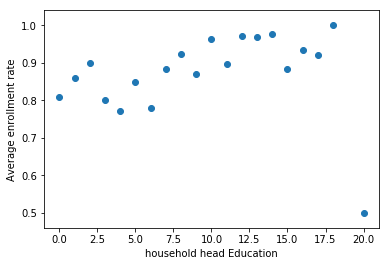

In [25]:
# Your code here
household_edu = progress_a.groupby(['hohedu'])['sc'].mean()
household_edu_values=household_edu.values
household_edu=progress_a.hohedu.unique()
#creating the scatter plot
plt.scatter(household_edu,household_edu_values)
plt.xlabel("household head Education")
plt.ylabel("Average enrollment rate")

increase in education level leads to increase in average enrollment rate with the exception at education level 20

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

Text(0.5,0,'Average enrollment in the year 1997')

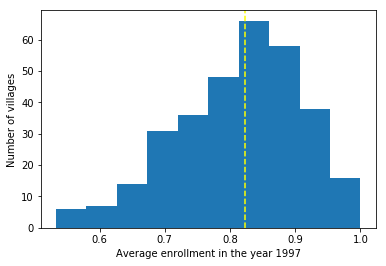

In [26]:
# Your code here
hist1= treatment_poor_97.groupby(['village'])['sc'].mean()
plt.hist(hist1)
plt.axvline(treatment_poor_97.sc.mean(),color='yellow', linestyle='dashed')
plt.ylabel("Number of villages")
plt.xlabel("Average enrollment in the year 1997")

Text(0.5,0,'average enrollment in the year 1998')

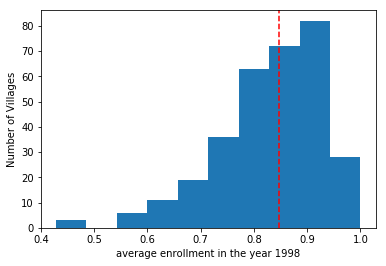

In [29]:
hist2=treatment_poor_98.groupby(['village'])['sc'].mean()
plt.hist(hist2)
plt.axvline(treatment_poor_98.sc.mean(), color='red', linestyle='dashed')
plt.ylabel("Number of Villages")
plt.xlabel("average enrollment in the year 1998")

In [30]:
#conducting t test with null values included
ttest_with_null_values = ttest_ind(treatment_poor_97.groupby('village')['sc'].mean(),treatment_poor_98.groupby('village')['sc'].mean()).pvalue
ttest_with_null_values

0.04424870036572115

In [31]:
#conducting t test without null values
treatment_poor_97_withoutna=treatment_poor_97.dropna()
treatment_poor_98_withoutna=treatment_poor_98.dropna()
ttest_without_null_values = ttest_ind(treatment_poor_97_withoutna.groupby('village')['sc'].mean(),treatment_poor_98_withoutna.groupby('village')['sc'].mean()).pvalue
ttest_without_null_values

0.010587739721624679

In [ ]:
 The t test value in both the scenarios ie with nulls(0.044) and without nulls(0.0105) is less than the 0.05. 
Hence we can consider the means to be statistically significant

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [49]:
# Your code here
data_1998=progress_a[progress_a['year']==98].dropna()
poor_98=data_1998[data_1998['poor']=='pobre'].dropna()
poor_data=progress_a[progress_a['poor']=='pobre'].dropna()



In [50]:
treatment_poor_98.sc.dropna().mean()

0.8464791213954308

In [51]:
control_poor_98.sc.dropna().mean()

0.807636956730308

In [62]:
ttest_ind(treatment_poor_98.sc.dropna().values,control_poor_98.sc.values)

Ttest_indResult(statistic=nan, pvalue=nan)

(12474, 21)

*Discuss your results here*

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [42]:
# Your code here
regression = smf.ols(formula = 'sc ~ progresa',data=data_1998).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           5.66e-16
Time:                        22:01:27   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.00



The coefficient for the regression is 0.0383.
The p_value in the regression model is lesser than 0.05. This shows that the value is statistically significant and there is an effect due to treatment. Hence, we reject the null hypothesis 



### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [43]:
# Your code here
mul_regression = smf.ols(formula = 'sc ~ age + dist_sec + sex + hohedu + indig + min_dist + progresa',data=data_1998).fit()
print(mul_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1365.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:01:50   Log-Likelihood:                -7129.9
No. Observations:               26155   AIC:                         1.428e+04
Df Residuals:                   26147   BIC:                         1.434e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4630      0.01

The standard error has reduced
Coefficient of the treatment variable have been reduced
The othet variables are not significant enough and hence we are not able to understand the impact of control variables*

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [44]:
# Your code here
difference_treatment = treatment_poor_98.sc.mean() - treatment_poor_97.sc.mean() 
difference_control =  control_poor_98.sc.mean() - control_poor_97.sc.mean()

diff_in_diff = difference_treatment - difference_control

print(diff_in_diff)

0.031331280319323085



The result is less than the previous regression. 
There is a change in the treatment group estimate

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [45]:
# Your code here
#selecting those rows where poor =='pobre and dropping null values
data_poor=progress_a[progress_a['poor']=='pobre'].dropna()
data_poor['post'] = np.where(data_poor['year']==97, '0', '1')

diff_in_diff2 = smf.ols(formula="sc ~ progresa + post + progresa:post + age + dist_sec + sex + hohedu + min_dist ", data=data_poor, missing='drop').fit()
diff_in_diff2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2756.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:02:27   Log-Likelihood:                -16139.
No. Observations:               56893   AIC:                         3.230e+04
Df Residuals:                   56884   BIC:                         3.238e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.4331      0.007    198.380      0.000       1.419       1.447
progresa[T.basal]               0.0009      0.004      0.245      0.806      -0.006       0.008
post[T.1]                       0.0323      0.004      7.334      0.000       0.024       0.041
progresa[T.basal]:post[T.1]     0.0305      0.006      5.466      0.000       0.020       0.041
age                            -0.0653      0.000   -142.654      0.000      -0.066      -0.064
dist_sec                       -0.0094      0.001    -14.825      0.000      -0.011      -0.008
sex                             0.0332      0.003     12.303      0.000       0.028       0.038
hohedu                          0.0071      0.001     13.116      0.000       0.006       0.008
min_dist                        0.0007   3.23e-05     21.943      0.000       0.001       0.001
==============================================================================
Omnibus:                     5494.032   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7259.719
Skew:                          -0.873   Prob(JB):                         0.00
Kurtosis:                       3.127   Cond. No.                         693.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*
The progresa value is 0.0305. P value is less than 0.05 which means that it is statistically significant. 
When we see the progresa estimate without interaction, the value is not that statistically significant. Hence we can assume that the treatment group did increase the likelihood of enrollment.

The presence and interaction of other variables may have caused a slight decrease in the estimate
Diff in diff between treatment and control would have not existed had it not been for the treatment group.


### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.


Yes progressa had some impact on the enrollment rate. However we cannot say with confidence how much of an impact the progresa variable had after running different tests.